In [1]:
import os
import pandas as pd
import numpy as np
createVar = locals()
from SpatialDM.main import *
from SpatialDM.plottings import *

## load samples in batch

In [2]:
datadir = '/home/yoyo/1_spatial/8_intestine/FINDer/'

In [5]:
data=['A1','A2','A3','A4','A6','A7','A8','A9']

In [117]:
from SpatialDM.dataset import *
adata = A1()
A2_adata = A2()
A3_adata = A3()
A4_adata = A4()
A6_adata = A6()
A7_adata = A7()
A8_adata = A8()
A9_adata = A9()

for d in data:
    adata = locals()['{}_adata'.format(d)]
    createVar[d] = SpatialDM(pd.DataFrame(adata.X, index=adata.obs_names, columns=adata.var_names),
               pd.DataFrame(adata.raw.X, index=adata.obs_names, columns=adata.var_names),
               adata.obsm['spatial'])
    print(d+' done!')

/tmp/ipykernel_3585/3449943674.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw.columns = raw.columns.str.replace('.','-')
/tmp/ipykernel_3585/3449943674.py:24: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  createVar[d +'_adata'] = ann.AnnData(raw)


A1 done!
A2 done!
A3 done!
A4 done!
A6 done!
A7 done!
A8 done!
A9 done!


In [122]:
samples = [A1,A2,A3,A4,A6,A7,A8,A9]

## z-score selection

In [123]:
for sample in samples:
    sample.weight_matrix(l=75, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel

    sample.extract_lr('human', '/home/yoyo/1_spatial', min_cell=10)      # find overlapping LRs from CellChatDB

    sample.spatialdm_global(100, select_num=None, method='z-score',nproc=50)     # global Moran selection

    sample.sig_pairs(method='z-score', fdr=True, threshold=0.1)     # select significant pairs

    sample.spatialdm_local(n_perm=100, method='z-score', select_num=None, nproc=50)     # local spot selection
    sample.sig_spots(method='z-score', fdr=False, threshold=0.1)     # significant local spots

0 pairs global selection finished in: 0.04214167594909668
1 pairs global selection finished in: 0.05938291549682617
2 pairs global selection finished in: 0.07125377655029297
3 pairs global selection finished in: 0.05951118469238281
4 pairs global selection finished in: 0.04057955741882324
5 pairs global selection finished in: 0.04326915740966797
6 pairs global selection finished in: 0.04861807823181152
7 pairs global selection finished in: 0.0627443790435791
8 pairs global selection finished in: 0.05029892921447754
9 pairs global selection finished in: 0.03676414489746094
10 pairs global selection finished in: 0.04980897903442383
11 pairs global selection finished in: 0.07730817794799805
12 pairs global selection finished in: 0.05992746353149414
13 pairs global selection finished in: 0.05490255355834961
14 pairs global selection finished in: 0.03518176078796387
15 pairs global selection finished in: 0.03492617607116699
16 pairs global selection finished in: 0.035840511322021484
17 pair

141 pairs global selection finished in: 0.052036285400390625
142 pairs global selection finished in: 0.027581453323364258
143 pairs global selection finished in: 0.05180621147155762
144 pairs global selection finished in: 0.031462907791137695
145 pairs global selection finished in: 0.03460097312927246
146 pairs global selection finished in: 0.04932808876037598


/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/spatialdm/utils.py:82: RuntimeWarning: invalid value encountered in double_scalars
  sample.global_I[k] = np.matmul(np.matmul(sample.rbf_d, y), x) / \


147 pairs global selection finished in: 0.06092357635498047
148 pairs global selection finished in: 0.0592961311340332
149 pairs global selection finished in: 0.03871583938598633
150 pairs global selection finished in: 0.03682994842529297
151 pairs global selection finished in: 0.02796196937561035
152 pairs global selection finished in: 0.04225969314575195
153 pairs global selection finished in: 0.03672075271606445
154 pairs global selection finished in: 0.04421734809875488
155 pairs global selection finished in: 0.043300628662109375
156 pairs global selection finished in: 0.050823211669921875
157 pairs global selection finished in: 0.057036399841308594
158 pairs global selection finished in: 0.0567929744720459
159 pairs global selection finished in: 0.05780363082885742
160 pairs global selection finished in: 0.05591082572937012
161 pairs global selection finished in: 0.05594205856323242
162 pairs global selection finished in: 0.02762746810913086
163 pairs global selection finished in:

285 pairs global selection finished in: 0.06182384490966797
286 pairs global selection finished in: 0.057198286056518555
287 pairs global selection finished in: 0.06158924102783203
288 pairs global selection finished in: 0.0974578857421875
289 pairs global selection finished in: 0.09526419639587402
290 pairs global selection finished in: 0.08900713920593262
291 pairs global selection finished in: 0.06653022766113281
292 pairs global selection finished in: 0.05692338943481445
293 pairs global selection finished in: 0.08095502853393555
294 pairs global selection finished in: 0.09173369407653809
295 pairs global selection finished in: 0.09519243240356445
296 pairs global selection finished in: 0.06455731391906738
297 pairs global selection finished in: 0.06020784378051758
298 pairs global selection finished in: 0.06463027000427246
299 pairs global selection finished in: 0.060915470123291016
300 pairs global selection finished in: 0.08041596412658691
301 pairs global selection finished in:

424 pairs global selection finished in: 0.06700372695922852
425 pairs global selection finished in: 0.043797969818115234
426 pairs global selection finished in: 0.042798757553100586
427 pairs global selection finished in: 0.04680323600769043
428 pairs global selection finished in: 0.059281110763549805
429 pairs global selection finished in: 0.05687260627746582
430 pairs global selection finished in: 0.05934762954711914
431 pairs global selection finished in: 0.05921339988708496
432 pairs global selection finished in: 0.05960369110107422
433 pairs global selection finished in: 0.08090782165527344
434 pairs global selection finished in: 0.0519711971282959
435 pairs global selection finished in: 0.053534746170043945
436 pairs global selection finished in: 0.0631413459777832
437 pairs global selection finished in: 0.05641436576843262
438 pairs global selection finished in: 0.0571901798248291
439 pairs global selection finished in: 0.06269574165344238
440 pairs global selection finished in:

562 pairs global selection finished in: 0.02864551544189453
563 pairs global selection finished in: 0.0425724983215332
564 pairs global selection finished in: 0.03143191337585449
565 pairs global selection finished in: 0.02531147003173828
566 pairs global selection finished in: 0.03847551345825195
567 pairs global selection finished in: 0.05089259147644043
568 pairs global selection finished in: 0.052877187728881836
569 pairs global selection finished in: 0.05315375328063965
570 pairs global selection finished in: 0.049199581146240234
571 pairs global selection finished in: 0.04730725288391113
572 pairs global selection finished in: 0.03599262237548828
573 pairs global selection finished in: 0.028734683990478516
574 pairs global selection finished in: 0.051117658615112305
575 pairs global selection finished in: 0.051146507263183594
576 pairs global selection finished in: 0.051058053970336914
577 pairs global selection finished in: 0.05481863021850586
578 pairs global selection finished

700 pairs global selection finished in: 0.06657838821411133
701 pairs global selection finished in: 0.0628664493560791
702 pairs global selection finished in: 0.060803890228271484
703 pairs global selection finished in: 0.06386971473693848
704 pairs global selection finished in: 0.062300920486450195
705 pairs global selection finished in: 0.0785837173461914
706 pairs global selection finished in: 0.06517601013183594
707 pairs global selection finished in: 0.06490445137023926
708 pairs global selection finished in: 0.06083321571350098
709 pairs global selection finished in: 0.060270071029663086
710 pairs global selection finished in: 0.04691481590270996
711 pairs global selection finished in: 0.035512685775756836
712 pairs global selection finished in: 0.033139944076538086
713 pairs global selection finished in: 0.0423433780670166
714 pairs global selection finished in: 0.04362201690673828
715 pairs global selection finished in: 0.06125211715698242
716 pairs global selection finished in

840 pairs global selection finished in: 0.07000064849853516
841 pairs global selection finished in: 0.058702707290649414
842 pairs global selection finished in: 0.07242584228515625
843 pairs global selection finished in: 0.08457660675048828
844 pairs global selection finished in: 0.10101652145385742
845 pairs global selection finished in: 0.09891462326049805
846 pairs global selection finished in: 0.08866357803344727
847 pairs global selection finished in: 0.09121966361999512
848 pairs global selection finished in: 0.10514974594116211
849 pairs global selection finished in: 0.14593100547790527
850 pairs global selection finished in: 0.10145378112792969
851 pairs global selection finished in: 0.08387589454650879
852 pairs global selection finished in: 0.10482335090637207
853 pairs global selection finished in: 0.08138561248779297
854 pairs global selection finished in: 0.09835100173950195
855 pairs global selection finished in: 0.10887551307678223
856 pairs global selection finished in:

978 pairs global selection finished in: 0.07874655723571777
979 pairs global selection finished in: 0.07356119155883789
980 pairs global selection finished in: 0.0495905876159668
981 pairs global selection finished in: 0.05775785446166992
982 pairs global selection finished in: 0.0822293758392334
983 pairs global selection finished in: 0.0832667350769043
984 pairs global selection finished in: 0.08550071716308594
985 pairs global selection finished in: 0.09265899658203125
986 pairs global selection finished in: 0.07667183876037598
987 pairs global selection finished in: 0.07727241516113281
988 pairs global selection finished in: 0.07651448249816895
989 pairs global selection finished in: 0.08024859428405762
990 pairs global selection finished in: 0.07118940353393555
991 pairs global selection finished in: 0.08219242095947266
992 pairs global selection finished in: 0.0913233757019043
993 pairs global selection finished in: 0.10571074485778809
994 pairs global selection finished in: 0.12

/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/spatialdm/main.py:231: RuntimeWarning: invalid value encountered in true_divide
  self.pos[k] = (abs(x) / x + abs(y) / y) / 2


1pairs local selection finished in 0.09289169311523438
2pairs local selection finished in 0.16077351570129395
3pairs local selection finished in 0.11663317680358887
4pairs local selection finished in 0.15886712074279785
5pairs local selection finished in 0.11070418357849121
6pairs local selection finished in 0.11235952377319336
7pairs local selection finished in 0.11509299278259277
8pairs local selection finished in 0.1227719783782959
9pairs local selection finished in 0.1182866096496582
10pairs local selection finished in 0.11809086799621582
11pairs local selection finished in 0.11638283729553223
12pairs local selection finished in 0.11373543739318848
13pairs local selection finished in 0.1133432388305664
14pairs local selection finished in 0.11437702178955078
15pairs local selection finished in 0.07799577713012695
16pairs local selection finished in 0.06337690353393555
17pairs local selection finished in 0.06594729423522949
18pairs local selection finished in 0.10983896255493164
19pa

149pairs local selection finished in 0.09538483619689941
150pairs local selection finished in 0.13197088241577148
151pairs local selection finished in 0.10662603378295898
152pairs local selection finished in 0.09721779823303223
153pairs local selection finished in 0.1116483211517334
154pairs local selection finished in 0.10225296020507812
155pairs local selection finished in 0.1110990047454834
156pairs local selection finished in 0.10683465003967285
157pairs local selection finished in 0.10736918449401855
158pairs local selection finished in 0.10381174087524414
159pairs local selection finished in 0.11250019073486328
160pairs local selection finished in 0.11046385765075684
161pairs local selection finished in 0.10246729850769043
162pairs local selection finished in 0.11440753936767578
163pairs local selection finished in 0.08038520812988281
164pairs local selection finished in 0.08601880073547363
165pairs local selection finished in 0.10597109794616699
166pairs local selection finished

294pairs local selection finished in 0.08072614669799805
295pairs local selection finished in 0.05926847457885742
296pairs local selection finished in 0.06275320053100586
297pairs local selection finished in 0.11409592628479004
298pairs local selection finished in 0.10775589942932129
299pairs local selection finished in 0.11327934265136719
300pairs local selection finished in 0.11013388633728027
301pairs local selection finished in 0.10944151878356934
302pairs local selection finished in 0.10502481460571289
303pairs local selection finished in 0.1106560230255127
304pairs local selection finished in 0.10694742202758789
305pairs local selection finished in 0.11776566505432129
306pairs local selection finished in 0.1154634952545166
307pairs local selection finished in 0.06215214729309082
308pairs local selection finished in 0.08895230293273926
309pairs local selection finished in 0.0854651927947998
310pairs local selection finished in 0.06063246726989746
311pairs local selection finished 

56 pairs global selection finished in: 0.028981924057006836
57 pairs global selection finished in: 0.034183502197265625
58 pairs global selection finished in: 0.02536606788635254
59 pairs global selection finished in: 0.05437135696411133
60 pairs global selection finished in: 0.05158567428588867
61 pairs global selection finished in: 0.05407977104187012
62 pairs global selection finished in: 0.07092666625976562
63 pairs global selection finished in: 0.061959028244018555
64 pairs global selection finished in: 0.05387592315673828
65 pairs global selection finished in: 0.05341649055480957
66 pairs global selection finished in: 0.05248832702636719
67 pairs global selection finished in: 0.046669721603393555
68 pairs global selection finished in: 0.02919483184814453
69 pairs global selection finished in: 0.05700206756591797
70 pairs global selection finished in: 0.05946660041809082
71 pairs global selection finished in: 0.05554628372192383
72 pairs global selection finished in: 0.05411005020

198 pairs global selection finished in: 0.05064821243286133
199 pairs global selection finished in: 0.050177574157714844
200 pairs global selection finished in: 0.05194830894470215
201 pairs global selection finished in: 0.04364180564880371
202 pairs global selection finished in: 0.029902935028076172
203 pairs global selection finished in: 0.04380202293395996
204 pairs global selection finished in: 0.04608607292175293
205 pairs global selection finished in: 0.05045485496520996
206 pairs global selection finished in: 0.05573463439941406
207 pairs global selection finished in: 0.05295300483703613
208 pairs global selection finished in: 0.05008554458618164
209 pairs global selection finished in: 0.05265927314758301
210 pairs global selection finished in: 0.056867122650146484
211 pairs global selection finished in: 0.05316424369812012
212 pairs global selection finished in: 0.0277559757232666
213 pairs global selection finished in: 0.03462529182434082
214 pairs global selection finished in

335 pairs global selection finished in: 0.05220484733581543
336 pairs global selection finished in: 0.03512167930603027
337 pairs global selection finished in: 0.02530527114868164
338 pairs global selection finished in: 0.037801504135131836
339 pairs global selection finished in: 0.028701066970825195
340 pairs global selection finished in: 0.031073808670043945
341 pairs global selection finished in: 0.030693531036376953
342 pairs global selection finished in: 0.04405331611633301
343 pairs global selection finished in: 0.03540396690368652
344 pairs global selection finished in: 0.027874469757080078
345 pairs global selection finished in: 0.03911471366882324
346 pairs global selection finished in: 0.04382729530334473
347 pairs global selection finished in: 0.02865004539489746
348 pairs global selection finished in: 0.04223346710205078
349 pairs global selection finished in: 0.039338111877441406
350 pairs global selection finished in: 0.029584407806396484
351 pairs global selection finish

472 pairs global selection finished in: 0.05579948425292969
473 pairs global selection finished in: 0.06383776664733887
474 pairs global selection finished in: 0.051017045974731445
475 pairs global selection finished in: 0.03361630439758301
476 pairs global selection finished in: 0.030724048614501953
477 pairs global selection finished in: 0.03871035575866699
478 pairs global selection finished in: 0.03938698768615723
479 pairs global selection finished in: 0.031859636306762695
480 pairs global selection finished in: 0.056560516357421875
481 pairs global selection finished in: 0.059523582458496094
482 pairs global selection finished in: 0.06410598754882812
483 pairs global selection finished in: 0.0636906623840332
484 pairs global selection finished in: 0.05470156669616699
485 pairs global selection finished in: 0.05805492401123047
486 pairs global selection finished in: 0.06246638298034668
487 pairs global selection finished in: 0.06527495384216309
488 pairs global selection finished 

610 pairs global selection finished in: 0.06576895713806152
611 pairs global selection finished in: 0.06471109390258789
612 pairs global selection finished in: 0.06524348258972168
613 pairs global selection finished in: 0.06398868560791016
614 pairs global selection finished in: 0.06080746650695801
615 pairs global selection finished in: 0.06812644004821777
616 pairs global selection finished in: 0.07982182502746582
617 pairs global selection finished in: 0.10221076011657715
618 pairs global selection finished in: 0.1128542423248291
619 pairs global selection finished in: 0.0855264663696289
620 pairs global selection finished in: 0.1287403106689453
621 pairs global selection finished in: 0.14554190635681152
622 pairs global selection finished in: 0.12011504173278809
623 pairs global selection finished in: 0.09715843200683594
624 pairs global selection finished in: 0.07828593254089355
625 pairs global selection finished in: 0.09445786476135254
626 pairs global selection finished in: 0.0

751 pairs global selection finished in: 0.04222822189331055
752 pairs global selection finished in: 0.047406673431396484
753 pairs global selection finished in: 0.04478168487548828
754 pairs global selection finished in: 0.049179792404174805
755 pairs global selection finished in: 0.04283952713012695
756 pairs global selection finished in: 0.04801034927368164
757 pairs global selection finished in: 0.04733896255493164
758 pairs global selection finished in: 0.04677724838256836
759 pairs global selection finished in: 0.0428617000579834
760 pairs global selection finished in: 0.037116050720214844
761 pairs global selection finished in: 0.04007411003112793
762 pairs global selection finished in: 0.050098419189453125
763 pairs global selection finished in: 0.04311943054199219
764 pairs global selection finished in: 0.04427361488342285
765 pairs global selection finished in: 0.06051325798034668
766 pairs global selection finished in: 0.055970191955566406
767 pairs global selection finished 

888 pairs global selection finished in: 0.07775473594665527
889 pairs global selection finished in: 0.07052969932556152
890 pairs global selection finished in: 0.07615423202514648
891 pairs global selection finished in: 0.06756830215454102
892 pairs global selection finished in: 0.053708553314208984
893 pairs global selection finished in: 0.06500458717346191
894 pairs global selection finished in: 0.07820558547973633
895 pairs global selection finished in: 0.04274797439575195
896 pairs global selection finished in: 0.052396297454833984
897 pairs global selection finished in: 0.06623482704162598
898 pairs global selection finished in: 0.07451701164245605
899 pairs global selection finished in: 0.04726910591125488
900 pairs global selection finished in: 0.07490086555480957
901 pairs global selection finished in: 0.07724833488464355
902 pairs global selection finished in: 0.04554343223571777
903 pairs global selection finished in: 0.04887247085571289
904 pairs global selection finished in

1025 pairs global selection finished in: 0.061263084411621094
1026 pairs global selection finished in: 0.06638860702514648
1027 pairs global selection finished in: 0.053086280822753906
1028 pairs global selection finished in: 0.06183743476867676
1029 pairs global selection finished in: 0.07105851173400879
1030 pairs global selection finished in: 0.031478166580200195
1031 pairs global selection finished in: 0.04735612869262695
1032 pairs global selection finished in: 0.0559849739074707
1033 pairs global selection finished in: 0.059925079345703125
1034 pairs global selection finished in: 0.05631756782531738
1035 pairs global selection finished in: 0.05336952209472656
1036 pairs global selection finished in: 0.05562305450439453
1037 pairs global selection finished in: 0.051232099533081055
1038 pairs global selection finished in: 0.054514408111572266
1039 pairs global selection finished in: 0.05104255676269531
1040 pairs global selection finished in: 0.05101442337036133
1041 pairs global s

59pairs local selection finished in 0.11706972122192383
60pairs local selection finished in 0.10856962203979492
61pairs local selection finished in 0.11958837509155273
62pairs local selection finished in 0.08594822883605957
63pairs local selection finished in 0.07717013359069824
64pairs local selection finished in 0.08261585235595703
65pairs local selection finished in 0.12569904327392578
66pairs local selection finished in 0.10950589179992676
67pairs local selection finished in 0.08662819862365723
68pairs local selection finished in 0.09737801551818848
69pairs local selection finished in 0.11624598503112793
70pairs local selection finished in 0.10730886459350586
71pairs local selection finished in 0.09491229057312012
72pairs local selection finished in 0.08682799339294434
73pairs local selection finished in 0.0975959300994873
74pairs local selection finished in 0.08669114112854004
75pairs local selection finished in 0.12272191047668457
76pairs local selection finished in 0.10798311233

204pairs local selection finished in 0.11195492744445801
205pairs local selection finished in 0.09853601455688477
206pairs local selection finished in 0.11849117279052734
207pairs local selection finished in 0.0799252986907959
208pairs local selection finished in 0.09071683883666992
209pairs local selection finished in 0.1080169677734375
210pairs local selection finished in 0.09342741966247559
211pairs local selection finished in 0.10593461990356445
212pairs local selection finished in 0.10088062286376953
213pairs local selection finished in 0.07269835472106934
214pairs local selection finished in 0.07246518135070801
215pairs local selection finished in 0.02929210662841797
216pairs local selection finished in 0.09744739532470703
217pairs local selection finished in 0.07002043724060059
218pairs local selection finished in 0.0923454761505127
219pairs local selection finished in 0.09818339347839355
220pairs local selection finished in 0.09818458557128906
221pairs local selection finished 

350pairs local selection finished in 0.09716439247131348
351pairs local selection finished in 0.09978795051574707
352pairs local selection finished in 0.10160446166992188
353pairs local selection finished in 0.10160994529724121
354pairs local selection finished in 0.09565162658691406
355pairs local selection finished in 0.0957801342010498
356pairs local selection finished in 0.10550618171691895
357pairs local selection finished in 0.10011482238769531
358pairs local selection finished in 0.10098695755004883
359pairs local selection finished in 0.09578323364257812
360pairs local selection finished in 0.08714628219604492
361pairs local selection finished in 0.10353231430053711
362pairs local selection finished in 0.1103365421295166
363pairs local selection finished in 0.09952616691589355
364pairs local selection finished in 0.10189080238342285
365pairs local selection finished in 0.09607481956481934
366pairs local selection finished in 0.08868837356567383
367pairs local selection finished

48 pairs global selection finished in: 0.03491806983947754
49 pairs global selection finished in: 0.012219905853271484
50 pairs global selection finished in: 0.033278703689575195
51 pairs global selection finished in: 0.012377262115478516
52 pairs global selection finished in: 0.031071186065673828
53 pairs global selection finished in: 0.013491392135620117
54 pairs global selection finished in: 0.02940082550048828
55 pairs global selection finished in: 0.012363433837890625
56 pairs global selection finished in: 0.03801846504211426
57 pairs global selection finished in: 0.012343883514404297
58 pairs global selection finished in: 0.034160614013671875
59 pairs global selection finished in: 0.02035355567932129
60 pairs global selection finished in: 0.031110525131225586
61 pairs global selection finished in: 0.015726089477539062
62 pairs global selection finished in: 0.031540870666503906
63 pairs global selection finished in: 0.020471572875976562
64 pairs global selection finished in: 0.034

187 pairs global selection finished in: 0.044741153717041016
188 pairs global selection finished in: 0.03912997245788574
189 pairs global selection finished in: 0.01992011070251465
190 pairs global selection finished in: 0.025850772857666016
191 pairs global selection finished in: 0.030226469039916992
192 pairs global selection finished in: 0.054296255111694336
193 pairs global selection finished in: 0.04836440086364746
194 pairs global selection finished in: 0.0249025821685791
195 pairs global selection finished in: 0.023815393447875977
196 pairs global selection finished in: 0.027950525283813477
197 pairs global selection finished in: 0.024013757705688477
198 pairs global selection finished in: 0.027772903442382812
199 pairs global selection finished in: 0.031847238540649414
200 pairs global selection finished in: 0.0461270809173584
201 pairs global selection finished in: 0.025632858276367188
202 pairs global selection finished in: 0.018271923065185547
203 pairs global selection fini

323 pairs global selection finished in: 0.02495718002319336
324 pairs global selection finished in: 0.033962249755859375
325 pairs global selection finished in: 0.023046016693115234
326 pairs global selection finished in: 0.02498340606689453
327 pairs global selection finished in: 0.022544145584106445
328 pairs global selection finished in: 0.02322220802307129
329 pairs global selection finished in: 0.02852630615234375
330 pairs global selection finished in: 0.05454850196838379
331 pairs global selection finished in: 0.04760313034057617
332 pairs global selection finished in: 0.04503989219665527
333 pairs global selection finished in: 0.04009604454040527
334 pairs global selection finished in: 0.012653827667236328
335 pairs global selection finished in: 0.0305483341217041
336 pairs global selection finished in: 0.02058243751525879
337 pairs global selection finished in: 0.03455948829650879
338 pairs global selection finished in: 0.01957988739013672
339 pairs global selection finished i

464 pairs global selection finished in: 0.03269052505493164
465 pairs global selection finished in: 0.03264307975769043
466 pairs global selection finished in: 0.036484479904174805
467 pairs global selection finished in: 0.030714035034179688
468 pairs global selection finished in: 0.030399322509765625
469 pairs global selection finished in: 0.03325772285461426
470 pairs global selection finished in: 0.037285566329956055
471 pairs global selection finished in: 0.04115724563598633
472 pairs global selection finished in: 0.030898094177246094
473 pairs global selection finished in: 0.03559279441833496
474 pairs global selection finished in: 0.03793597221374512
475 pairs global selection finished in: 0.028815031051635742
476 pairs global selection finished in: 0.037512779235839844
477 pairs global selection finished in: 0.035857200622558594
478 pairs global selection finished in: 0.029284238815307617
479 pairs global selection finished in: 0.037919044494628906
480 pairs global selection fin

604 pairs global selection finished in: 0.039391517639160156
605 pairs global selection finished in: 0.03878903388977051
606 pairs global selection finished in: 0.03196072578430176
607 pairs global selection finished in: 0.0504450798034668
608 pairs global selection finished in: 0.03808236122131348
609 pairs global selection finished in: 0.03452777862548828
610 pairs global selection finished in: 0.023200511932373047
611 pairs global selection finished in: 0.028397560119628906
612 pairs global selection finished in: 0.022365808486938477
613 pairs global selection finished in: 0.025564908981323242
614 pairs global selection finished in: 0.030778169631958008
615 pairs global selection finished in: 0.03410172462463379
616 pairs global selection finished in: 0.025931358337402344
617 pairs global selection finished in: 0.02974414825439453
618 pairs global selection finished in: 0.030280113220214844
619 pairs global selection finished in: 0.02377009391784668
620 pairs global selection finish

745 pairs global selection finished in: 0.0387418270111084
746 pairs global selection finished in: 0.012191534042358398
747 pairs global selection finished in: 0.027668237686157227
748 pairs global selection finished in: 0.02443218231201172
749 pairs global selection finished in: 0.03928089141845703
750 pairs global selection finished in: 0.01192474365234375
751 pairs global selection finished in: 0.04288768768310547
752 pairs global selection finished in: 0.011901378631591797
753 pairs global selection finished in: 0.03934621810913086
754 pairs global selection finished in: 0.03975939750671387
755 pairs global selection finished in: 0.031900882720947266
756 pairs global selection finished in: 0.027523279190063477
757 pairs global selection finished in: 0.019655466079711914
758 pairs global selection finished in: 0.01517629623413086
759 pairs global selection finished in: 0.022383928298950195
760 pairs global selection finished in: 0.0248565673828125
761 pairs global selection finished

881 pairs global selection finished in: 0.03140616416931152
882 pairs global selection finished in: 0.012598752975463867
883 pairs global selection finished in: 0.01839470863342285
884 pairs global selection finished in: 0.02942800521850586
885 pairs global selection finished in: 0.0159914493560791
886 pairs global selection finished in: 0.037899017333984375
887 pairs global selection finished in: 0.012215375900268555
888 pairs global selection finished in: 0.029491186141967773
889 pairs global selection finished in: 0.011921882629394531
890 pairs global selection finished in: 0.030057191848754883
891 pairs global selection finished in: 0.013498544692993164
892 pairs global selection finished in: 0.03968381881713867
893 pairs global selection finished in: 0.027762651443481445
894 pairs global selection finished in: 0.019503355026245117
895 pairs global selection finished in: 0.027519702911376953
896 pairs global selection finished in: 0.019037961959838867
897 pairs global selection fin

1019 pairs global selection finished in: 0.017838001251220703
1020 pairs global selection finished in: 0.012444019317626953
1021 pairs global selection finished in: 0.012080907821655273
1022 pairs global selection finished in: 0.012577295303344727
1023 pairs global selection finished in: 0.012545585632324219
1024 pairs global selection finished in: 0.01271510124206543
1025 pairs global selection finished in: 0.026031494140625
1026 pairs global selection finished in: 0.012123823165893555
1027 pairs global selection finished in: 0.01919722557067871
1028 pairs global selection finished in: 0.01584601402282715
1029 pairs global selection finished in: 0.019270896911621094
1030 pairs global selection finished in: 0.059845924377441406
1031 pairs global selection finished in: 0.01593756675720215
1032 pairs global selection finished in: 0.03532052040100098
1033 pairs global selection finished in: 0.024091243743896484
1034 pairs global selection finished in: 0.05173659324645996
1035 pairs global

28pairs local selection finished in 0.12031102180480957
29pairs local selection finished in 0.09716320037841797
30pairs local selection finished in 0.08590221405029297
31pairs local selection finished in 0.08903002738952637
32pairs local selection finished in 0.12444496154785156
33pairs local selection finished in 0.11208677291870117
34pairs local selection finished in 0.04295754432678223
35pairs local selection finished in 0.0717611312866211
36pairs local selection finished in 0.045645952224731445
37pairs local selection finished in 0.04975533485412598
38pairs local selection finished in 0.04502606391906738
39pairs local selection finished in 0.041281938552856445
40pairs local selection finished in 0.05412578582763672
41pairs local selection finished in 0.044341087341308594
42pairs local selection finished in 0.04460954666137695
43pairs local selection finished in 0.03364276885986328
44pairs local selection finished in 0.04694986343383789
45pairs local selection finished in 0.03810572

179pairs local selection finished in 0.010934591293334961
180pairs local selection finished in 0.05375814437866211
181pairs local selection finished in 0.14330387115478516
182pairs local selection finished in 0.043317317962646484
183pairs local selection finished in 0.04431486129760742
184pairs local selection finished in 0.04707837104797363
185pairs local selection finished in 0.036566972732543945
186pairs local selection finished in 0.03516197204589844
187pairs local selection finished in 0.030324697494506836
188pairs local selection finished in 0.04014706611633301
189pairs local selection finished in 0.0385136604309082
190pairs local selection finished in 0.036997318267822266
191pairs local selection finished in 0.03937721252441406
192pairs local selection finished in 0.034412384033203125
193pairs local selection finished in 0.03505516052246094
194pairs local selection finished in 0.06608414649963379
195pairs local selection finished in 0.03960466384887695
196pairs local selection f

322pairs local selection finished in 0.023159027099609375
323pairs local selection finished in 0.023248672485351562
324pairs local selection finished in 0.0168304443359375
325pairs local selection finished in 0.022296428680419922
326pairs local selection finished in 0.022969722747802734
327pairs local selection finished in 0.03413724899291992
328pairs local selection finished in 0.029920578002929688
329pairs local selection finished in 0.03685116767883301
330pairs local selection finished in 0.033442020416259766
331pairs local selection finished in 0.02142953872680664
332pairs local selection finished in 0.020196914672851562
333pairs local selection finished in 0.020123004913330078
334pairs local selection finished in 0.019500255584716797
335pairs local selection finished in 0.01929616928100586
336pairs local selection finished in 0.025061845779418945
337pairs local selection finished in 0.030697345733642578
338pairs local selection finished in 0.04816746711730957
339pairs local select

25 pairs global selection finished in: 0.014847278594970703
26 pairs global selection finished in: 0.028443574905395508
27 pairs global selection finished in: 0.025735855102539062
28 pairs global selection finished in: 0.023288726806640625
29 pairs global selection finished in: 0.01570725440979004
30 pairs global selection finished in: 0.01966094970703125
31 pairs global selection finished in: 0.013365745544433594
32 pairs global selection finished in: 0.018032550811767578
33 pairs global selection finished in: 0.023654460906982422
34 pairs global selection finished in: 0.023702621459960938
35 pairs global selection finished in: 0.019697189331054688
36 pairs global selection finished in: 0.013499021530151367
37 pairs global selection finished in: 0.025746583938598633
38 pairs global selection finished in: 0.0236053466796875
39 pairs global selection finished in: 0.013594865798950195
40 pairs global selection finished in: 0.02175593376159668
41 pairs global selection finished in: 0.0295

166 pairs global selection finished in: 0.04542183876037598
167 pairs global selection finished in: 0.01511240005493164
168 pairs global selection finished in: 0.04613375663757324
169 pairs global selection finished in: 0.013260364532470703
170 pairs global selection finished in: 0.03804659843444824
171 pairs global selection finished in: 0.019747257232666016
172 pairs global selection finished in: 0.013580083847045898
173 pairs global selection finished in: 0.025768280029296875
174 pairs global selection finished in: 0.016069412231445312
175 pairs global selection finished in: 0.03519892692565918
176 pairs global selection finished in: 0.03178906440734863
177 pairs global selection finished in: 0.013202667236328125
178 pairs global selection finished in: 0.038050174713134766
179 pairs global selection finished in: 0.012438535690307617
180 pairs global selection finished in: 0.03094768524169922
181 pairs global selection finished in: 0.024283409118652344
182 pairs global selection fini

302 pairs global selection finished in: 0.03392219543457031
303 pairs global selection finished in: 0.03395533561706543
304 pairs global selection finished in: 0.0337071418762207
305 pairs global selection finished in: 0.02791285514831543
306 pairs global selection finished in: 0.025772809982299805
307 pairs global selection finished in: 0.013104677200317383
308 pairs global selection finished in: 0.02052474021911621
309 pairs global selection finished in: 0.019672870635986328
310 pairs global selection finished in: 0.012769460678100586
311 pairs global selection finished in: 0.018679141998291016
312 pairs global selection finished in: 0.0258181095123291
313 pairs global selection finished in: 0.029705524444580078
314 pairs global selection finished in: 0.02583789825439453
315 pairs global selection finished in: 0.025824785232543945
316 pairs global selection finished in: 0.025997638702392578
317 pairs global selection finished in: 0.02597832679748535
318 pairs global selection finishe

441 pairs global selection finished in: 0.037096261978149414
442 pairs global selection finished in: 0.03717994689941406
443 pairs global selection finished in: 0.03699231147766113
444 pairs global selection finished in: 0.036592960357666016
445 pairs global selection finished in: 0.025983095169067383
446 pairs global selection finished in: 0.022235870361328125
447 pairs global selection finished in: 0.022275209426879883
448 pairs global selection finished in: 0.022251605987548828
449 pairs global selection finished in: 0.030731678009033203
450 pairs global selection finished in: 0.02980637550354004
451 pairs global selection finished in: 0.02225804328918457
452 pairs global selection finished in: 0.022172927856445312
453 pairs global selection finished in: 0.022196292877197266
454 pairs global selection finished in: 0.022119760513305664
455 pairs global selection finished in: 0.029249906539916992
456 pairs global selection finished in: 0.029973983764648438
457 pairs global selection f

577 pairs global selection finished in: 0.041814327239990234
578 pairs global selection finished in: 0.04075312614440918
579 pairs global selection finished in: 0.03170323371887207
580 pairs global selection finished in: 0.04045510292053223
581 pairs global selection finished in: 0.018038034439086914
582 pairs global selection finished in: 0.03341174125671387
583 pairs global selection finished in: 0.028217554092407227
584 pairs global selection finished in: 0.017187118530273438
585 pairs global selection finished in: 0.03323483467102051
586 pairs global selection finished in: 0.016134023666381836
587 pairs global selection finished in: 0.03133392333984375
588 pairs global selection finished in: 0.027730703353881836
589 pairs global selection finished in: 0.015465974807739258
590 pairs global selection finished in: 0.033599853515625
591 pairs global selection finished in: 0.03315567970275879
592 pairs global selection finished in: 0.02507925033569336
593 pairs global selection finished

716 pairs global selection finished in: 0.03832578659057617
717 pairs global selection finished in: 0.012123823165893555
718 pairs global selection finished in: 0.02697920799255371
719 pairs global selection finished in: 0.02799367904663086
720 pairs global selection finished in: 0.023218393325805664
721 pairs global selection finished in: 0.027730703353881836
722 pairs global selection finished in: 0.023963212966918945
723 pairs global selection finished in: 0.020966053009033203
724 pairs global selection finished in: 0.018772602081298828
725 pairs global selection finished in: 0.020238637924194336
726 pairs global selection finished in: 0.015207290649414062
727 pairs global selection finished in: 0.012188911437988281
728 pairs global selection finished in: 0.015141725540161133
729 pairs global selection finished in: 0.027669429779052734
730 pairs global selection finished in: 0.012175321578979492
731 pairs global selection finished in: 0.02323436737060547
732 pairs global selection f

855 pairs global selection finished in: 0.025698184967041016
856 pairs global selection finished in: 0.021860361099243164
857 pairs global selection finished in: 0.023457765579223633
858 pairs global selection finished in: 0.02613234519958496
859 pairs global selection finished in: 0.021907329559326172
860 pairs global selection finished in: 0.029821395874023438
861 pairs global selection finished in: 0.022073030471801758
862 pairs global selection finished in: 0.02228713035583496
863 pairs global selection finished in: 0.025771141052246094
864 pairs global selection finished in: 0.022778034210205078
865 pairs global selection finished in: 0.025239229202270508
866 pairs global selection finished in: 0.02222752571105957
867 pairs global selection finished in: 0.025585651397705078
868 pairs global selection finished in: 0.026014328002929688
869 pairs global selection finished in: 0.03798222541809082
870 pairs global selection finished in: 0.03376269340515137
871 pairs global selection fi

993 pairs global selection finished in: 0.025982141494750977
994 pairs global selection finished in: 0.02588057518005371
995 pairs global selection finished in: 0.030454635620117188
996 pairs global selection finished in: 0.026815176010131836
997 pairs global selection finished in: 0.02284526824951172
998 pairs global selection finished in: 0.025197505950927734
999 pairs global selection finished in: 0.02300739288330078
1000 pairs global selection finished in: 0.028887510299682617
1001 pairs global selection finished in: 0.026177644729614258
1002 pairs global selection finished in: 0.0333712100982666
1003 pairs global selection finished in: 0.02306079864501953
1004 pairs global selection finished in: 0.028911828994750977
1005 pairs global selection finished in: 0.02292466163635254
1006 pairs global selection finished in: 0.02305769920349121
1007 pairs global selection finished in: 0.02277970314025879
1008 pairs global selection finished in: 0.030774593353271484
1009 pairs global select

1133 pairs global selection finished in: 0.027922868728637695
1134 pairs global selection finished in: 0.027085065841674805
1135 pairs global selection finished in: 0.0259552001953125
1136 pairs global selection finished in: 0.02758193016052246
1137 pairs global selection finished in: 0.02973031997680664
1138 pairs global selection finished in: 0.037908077239990234
1139 pairs global selection finished in: 0.025713682174682617
1140 pairs global selection finished in: 0.0256655216217041
1141 pairs global selection finished in: 0.025905609130859375
1142 pairs global selection finished in: 0.01797032356262207
1143 pairs global selection finished in: 0.013379096984863281
1144 pairs global selection finished in: 0.013527393341064453
1145 pairs global selection finished in: 0.024080514907836914
1146 pairs global selection finished in: 0.019732952117919922
1147 pairs global selection finished in: 0.023686647415161133
1148 pairs global selection finished in: 0.029982566833496094
1149 pairs glob

55pairs local selection finished in 0.02837085723876953
56pairs local selection finished in 0.029338359832763672
57pairs local selection finished in 0.03885507583618164
58pairs local selection finished in 0.038808345794677734
59pairs local selection finished in 0.04775738716125488
60pairs local selection finished in 0.03162503242492676
61pairs local selection finished in 0.0331268310546875
62pairs local selection finished in 0.04847311973571777
63pairs local selection finished in 0.04098701477050781
64pairs local selection finished in 0.038979530334472656
65pairs local selection finished in 0.04804396629333496
66pairs local selection finished in 0.02657914161682129
67pairs local selection finished in 0.035986900329589844
68pairs local selection finished in 0.04463672637939453
69pairs local selection finished in 0.040409088134765625
70pairs local selection finished in 0.03897857666015625
71pairs local selection finished in 0.029046058654785156
72pairs local selection finished in 0.03662

202pairs local selection finished in 0.03481340408325195
203pairs local selection finished in 0.027879953384399414
204pairs local selection finished in 0.03753376007080078
205pairs local selection finished in 0.029936790466308594
206pairs local selection finished in 0.03970146179199219
207pairs local selection finished in 0.03886580467224121
208pairs local selection finished in 0.028661251068115234
209pairs local selection finished in 0.036745548248291016
210pairs local selection finished in 0.027768611907958984
211pairs local selection finished in 0.03389334678649902
212pairs local selection finished in 0.03479576110839844
213pairs local selection finished in 0.03494715690612793
214pairs local selection finished in 0.02852153778076172
215pairs local selection finished in 0.03332114219665527
216pairs local selection finished in 0.038787126541137695
217pairs local selection finished in 0.02730417251586914
218pairs local selection finished in 0.04242682456970215
219pairs local selection 

345pairs local selection finished in 0.03273367881774902
346pairs local selection finished in 0.026329517364501953
347pairs local selection finished in 0.04337334632873535
348pairs local selection finished in 0.026317119598388672
349pairs local selection finished in 0.027240991592407227
350pairs local selection finished in 0.024988174438476562
351pairs local selection finished in 0.04081463813781738
352pairs local selection finished in 0.03247952461242676
353pairs local selection finished in 0.03667449951171875
354pairs local selection finished in 0.038812875747680664
355pairs local selection finished in 0.03286623954772949
356pairs local selection finished in 0.032790422439575195
357pairs local selection finished in 0.025529861450195312
358pairs local selection finished in 0.0319979190826416
359pairs local selection finished in 0.03523612022399902
360pairs local selection finished in 0.02530813217163086
361pairs local selection finished in 0.04369020462036133
362pairs local selection 

490pairs local selection finished in 0.04097771644592285
491pairs local selection finished in 0.038863182067871094
492pairs local selection finished in 0.030988693237304688
493pairs local selection finished in 0.030730724334716797
494pairs local selection finished in 0.02577495574951172
495pairs local selection finished in 0.031975746154785156
496pairs local selection finished in 0.028809547424316406
497pairs local selection finished in 0.033049583435058594
498pairs local selection finished in 0.026148557662963867
499pairs local selection finished in 0.04326272010803223
500pairs local selection finished in 0.025339126586914062
501pairs local selection finished in 0.04045438766479492
502pairs local selection finished in 0.030948162078857422
503pairs local selection finished in 0.03539109230041504
504pairs local selection finished in 0.03832745552062988
505pairs local selection finished in 0.02517223358154297
506pairs local selection finished in 0.03662729263305664
507pairs local selecti

32 pairs global selection finished in: 0.013260364532470703
33 pairs global selection finished in: 0.011787652969360352
34 pairs global selection finished in: 0.012695550918579102
35 pairs global selection finished in: 0.014879703521728516
36 pairs global selection finished in: 0.015096664428710938
37 pairs global selection finished in: 0.014324426651000977
38 pairs global selection finished in: 0.020816802978515625
39 pairs global selection finished in: 0.007878303527832031
40 pairs global selection finished in: 0.006474018096923828
41 pairs global selection finished in: 0.021056413650512695
42 pairs global selection finished in: 0.01147603988647461
43 pairs global selection finished in: 0.006554126739501953
44 pairs global selection finished in: 0.041188955307006836
45 pairs global selection finished in: 0.0065975189208984375
46 pairs global selection finished in: 0.00612330436706543
47 pairs global selection finished in: 0.022744417190551758
48 pairs global selection finished in: 0.

180 pairs global selection finished in: 0.011761903762817383
181 pairs global selection finished in: 0.022543907165527344
182 pairs global selection finished in: 0.015187263488769531
183 pairs global selection finished in: 0.01121377944946289
184 pairs global selection finished in: 0.01966071128845215
185 pairs global selection finished in: 0.011208057403564453
186 pairs global selection finished in: 0.011330127716064453
187 pairs global selection finished in: 0.01908087730407715
188 pairs global selection finished in: 0.019198894500732422
189 pairs global selection finished in: 0.010877847671508789
190 pairs global selection finished in: 0.010810613632202148
191 pairs global selection finished in: 0.01645803451538086
192 pairs global selection finished in: 0.011795282363891602
193 pairs global selection finished in: 0.011791467666625977
194 pairs global selection finished in: 0.008446216583251953
195 pairs global selection finished in: 0.00570988655090332
196 pairs global selection fi

319 pairs global selection finished in: 0.011709213256835938
320 pairs global selection finished in: 0.014344930648803711
321 pairs global selection finished in: 0.012070178985595703
322 pairs global selection finished in: 0.01251673698425293
323 pairs global selection finished in: 0.012713193893432617
324 pairs global selection finished in: 0.014226198196411133
325 pairs global selection finished in: 0.012361526489257812
326 pairs global selection finished in: 0.012425422668457031
327 pairs global selection finished in: 0.012220621109008789
328 pairs global selection finished in: 0.022517681121826172
329 pairs global selection finished in: 0.015781402587890625
330 pairs global selection finished in: 0.018184900283813477
331 pairs global selection finished in: 0.01166987419128418
332 pairs global selection finished in: 0.021207809448242188
333 pairs global selection finished in: 0.018466949462890625
334 pairs global selection finished in: 0.012461185455322266
335 pairs global selection

459 pairs global selection finished in: 0.014472007751464844
460 pairs global selection finished in: 0.011925458908081055
461 pairs global selection finished in: 0.011703014373779297
462 pairs global selection finished in: 0.012396574020385742
463 pairs global selection finished in: 0.01087498664855957
464 pairs global selection finished in: 0.01534581184387207
465 pairs global selection finished in: 0.016147851943969727
466 pairs global selection finished in: 0.007739067077636719
467 pairs global selection finished in: 0.006477832794189453
468 pairs global selection finished in: 0.025353193283081055
469 pairs global selection finished in: 0.015920639038085938
470 pairs global selection finished in: 0.007992029190063477
471 pairs global selection finished in: 0.012207746505737305
472 pairs global selection finished in: 0.012149810791015625
473 pairs global selection finished in: 0.018763065338134766
474 pairs global selection finished in: 0.015958786010742188
475 pairs global selection

609 pairs global selection finished in: 0.006435394287109375
610 pairs global selection finished in: 0.006648540496826172
611 pairs global selection finished in: 0.007715702056884766
612 pairs global selection finished in: 0.006823301315307617
613 pairs global selection finished in: 0.006658077239990234
614 pairs global selection finished in: 0.0067005157470703125
615 pairs global selection finished in: 0.006777524948120117
616 pairs global selection finished in: 0.006882667541503906
617 pairs global selection finished in: 0.009408712387084961
618 pairs global selection finished in: 0.006978034973144531
619 pairs global selection finished in: 0.03231978416442871
620 pairs global selection finished in: 0.017941951751708984
621 pairs global selection finished in: 0.023752212524414062
622 pairs global selection finished in: 0.015285015106201172
623 pairs global selection finished in: 0.006622791290283203
624 pairs global selection finished in: 0.00666046142578125
625 pairs global selectio

750 pairs global selection finished in: 0.012404918670654297
751 pairs global selection finished in: 0.022821664810180664
752 pairs global selection finished in: 0.015162467956542969
753 pairs global selection finished in: 0.007461071014404297
754 pairs global selection finished in: 0.016216278076171875
755 pairs global selection finished in: 0.01619720458984375
756 pairs global selection finished in: 0.023015737533569336
757 pairs global selection finished in: 0.0072841644287109375
758 pairs global selection finished in: 0.007023811340332031
759 pairs global selection finished in: 0.01690220832824707
760 pairs global selection finished in: 0.01192617416381836
761 pairs global selection finished in: 0.011460065841674805
762 pairs global selection finished in: 0.007716178894042969
763 pairs global selection finished in: 0.008468866348266602
764 pairs global selection finished in: 0.0068624019622802734
765 pairs global selection finished in: 0.0232694149017334
766 pairs global selection 

887 pairs global selection finished in: 0.012700080871582031
888 pairs global selection finished in: 0.014700174331665039
889 pairs global selection finished in: 0.005776166915893555
890 pairs global selection finished in: 0.006075382232666016
891 pairs global selection finished in: 0.006246089935302734
892 pairs global selection finished in: 0.012205839157104492
893 pairs global selection finished in: 0.012375593185424805
894 pairs global selection finished in: 0.00784754753112793
895 pairs global selection finished in: 0.01170039176940918
896 pairs global selection finished in: 0.008338212966918945
897 pairs global selection finished in: 0.006193399429321289
898 pairs global selection finished in: 0.006097316741943359
899 pairs global selection finished in: 0.0060460567474365234
900 pairs global selection finished in: 0.012132883071899414
901 pairs global selection finished in: 0.015936613082885742
902 pairs global selection finished in: 0.011878013610839844
903 pairs global selectio

1027 pairs global selection finished in: 0.014698028564453125
1028 pairs global selection finished in: 0.006071329116821289
1029 pairs global selection finished in: 0.006205081939697266
1030 pairs global selection finished in: 0.006175041198730469
1031 pairs global selection finished in: 0.020684480667114258
1032 pairs global selection finished in: 0.016584157943725586
1033 pairs global selection finished in: 0.011757612228393555
1034 pairs global selection finished in: 0.00938105583190918
1035 pairs global selection finished in: 0.0064237117767333984
1036 pairs global selection finished in: 0.00628352165222168
1037 pairs global selection finished in: 0.006277322769165039
1038 pairs global selection finished in: 0.014016866683959961
1039 pairs global selection finished in: 0.011850833892822266
1040 pairs global selection finished in: 0.011691808700561523
1041 pairs global selection finished in: 0.015797853469848633
1042 pairs global selection finished in: 0.006025791168212891
1043 pair

30pairs local selection finished in 0.004967927932739258
31pairs local selection finished in 0.024786949157714844
32pairs local selection finished in 0.018731355667114258
33pairs local selection finished in 0.007249593734741211
34pairs local selection finished in 0.007307529449462891
35pairs local selection finished in 0.007600069046020508
36pairs local selection finished in 0.024889469146728516
37pairs local selection finished in 0.02274799346923828
38pairs local selection finished in 0.0030379295349121094
39pairs local selection finished in 0.004821300506591797
40pairs local selection finished in 0.005175352096557617
41pairs local selection finished in 0.02506732940673828
42pairs local selection finished in 0.019228696823120117
43pairs local selection finished in 0.007944345474243164
44pairs local selection finished in 0.0035278797149658203
45pairs local selection finished in 0.0031936168670654297
46pairs local selection finished in 0.002838611602783203
47pairs local selection finish

179pairs local selection finished in 0.01717543601989746
180pairs local selection finished in 0.014778375625610352
181pairs local selection finished in 0.0158231258392334
182pairs local selection finished in 0.0045871734619140625
183pairs local selection finished in 0.005030393600463867
184pairs local selection finished in 0.02431774139404297
185pairs local selection finished in 0.015353679656982422
186pairs local selection finished in 0.007481575012207031
187pairs local selection finished in 0.007427215576171875
188pairs local selection finished in 0.006867408752441406
189pairs local selection finished in 0.002574920654296875
190pairs local selection finished in 0.0025806427001953125
191pairs local selection finished in 0.010596275329589844
192pairs local selection finished in 0.0037889480590820312
193pairs local selection finished in 0.019764423370361328
194pairs local selection finished in 0.015762805938720703
195pairs local selection finished in 0.011861562728881836
196pairs local 

322pairs local selection finished in 0.019431591033935547
323pairs local selection finished in 0.004957914352416992
324pairs local selection finished in 0.004950046539306641
325pairs local selection finished in 0.00487208366394043
326pairs local selection finished in 0.014284610748291016
327pairs local selection finished in 0.02343130111694336
328pairs local selection finished in 0.008005142211914062
329pairs local selection finished in 0.0026628971099853516
330pairs local selection finished in 0.0026841163635253906
331pairs local selection finished in 0.002696990966796875
332pairs local selection finished in 0.002685546875
333pairs local selection finished in 0.0026662349700927734
334pairs local selection finished in 0.017277002334594727
335pairs local selection finished in 0.015807151794433594
336pairs local selection finished in 0.011781454086303711
337pairs local selection finished in 0.011792182922363281
338pairs local selection finished in 0.0026769638061523438
339pairs local sel

475pairs local selection finished in 0.019985437393188477
476pairs local selection finished in 0.023555755615234375
477pairs local selection finished in 0.0029091835021972656
478pairs local selection finished in 0.0027511119842529297
479pairs local selection finished in 0.0027670860290527344
480pairs local selection finished in 0.038623809814453125
481pairs local selection finished in 0.015790700912475586
482pairs local selection finished in 0.0027070045471191406
483pairs local selection finished in 0.002791166305541992
484pairs local selection finished in 0.0027441978454589844
485pairs local selection finished in 0.0031838417053222656
486pairs local selection finished in 0.01495504379272461
487pairs local selection finished in 0.016167640686035156
488pairs local selection finished in 0.011686086654663086
489pairs local selection finished in 0.006142616271972656
490pairs local selection finished in 0.011423349380493164
491pairs local selection finished in 0.018292665481567383
492pairs 

87 pairs global selection finished in: 0.014927864074707031
88 pairs global selection finished in: 0.010552406311035156
89 pairs global selection finished in: 0.012537956237792969
90 pairs global selection finished in: 0.010207176208496094
91 pairs global selection finished in: 0.01149892807006836
92 pairs global selection finished in: 0.009968280792236328
93 pairs global selection finished in: 0.018729686737060547
94 pairs global selection finished in: 0.010120868682861328
95 pairs global selection finished in: 0.012221097946166992
96 pairs global selection finished in: 0.010289192199707031
97 pairs global selection finished in: 0.010206222534179688
98 pairs global selection finished in: 0.010113000869750977
99 pairs global selection finished in: 0.010170221328735352
100 pairs global selection finished in: 0.01073145866394043
101 pairs global selection finished in: 0.010900020599365234
102 pairs global selection finished in: 0.011814355850219727
103 pairs global selection finished in:

232 pairs global selection finished in: 0.007353067398071289
233 pairs global selection finished in: 0.010280132293701172
234 pairs global selection finished in: 0.009857892990112305
235 pairs global selection finished in: 0.006095409393310547
236 pairs global selection finished in: 0.0060269832611083984
237 pairs global selection finished in: 0.006975650787353516
238 pairs global selection finished in: 0.006064176559448242
239 pairs global selection finished in: 0.0059452056884765625
240 pairs global selection finished in: 0.006166696548461914
241 pairs global selection finished in: 0.0063631534576416016
242 pairs global selection finished in: 0.00801992416381836
243 pairs global selection finished in: 0.006006002426147461
244 pairs global selection finished in: 0.005980253219604492
245 pairs global selection finished in: 0.0060274600982666016
246 pairs global selection finished in: 0.00619196891784668
247 pairs global selection finished in: 0.01419687271118164
248 pairs global select

375 pairs global selection finished in: 0.0157320499420166
376 pairs global selection finished in: 0.014472723007202148
377 pairs global selection finished in: 0.014725923538208008
378 pairs global selection finished in: 0.015271186828613281
379 pairs global selection finished in: 0.014315366744995117
380 pairs global selection finished in: 0.014494895935058594
381 pairs global selection finished in: 0.014223575592041016
382 pairs global selection finished in: 0.014942169189453125
383 pairs global selection finished in: 0.01455545425415039
384 pairs global selection finished in: 0.018597841262817383
385 pairs global selection finished in: 0.015125751495361328
386 pairs global selection finished in: 0.014580726623535156
387 pairs global selection finished in: 0.015025615692138672
388 pairs global selection finished in: 0.024351835250854492
389 pairs global selection finished in: 0.015910625457763672
390 pairs global selection finished in: 0.013340950012207031
391 pairs global selection 

521 pairs global selection finished in: 0.014815330505371094
522 pairs global selection finished in: 0.012534856796264648
523 pairs global selection finished in: 0.012863636016845703
524 pairs global selection finished in: 0.013610124588012695
525 pairs global selection finished in: 0.011824607849121094
526 pairs global selection finished in: 0.01188206672668457
527 pairs global selection finished in: 0.013556957244873047
528 pairs global selection finished in: 0.01585555076599121
529 pairs global selection finished in: 0.012441635131835938
530 pairs global selection finished in: 0.011911392211914062
531 pairs global selection finished in: 0.02198624610900879
532 pairs global selection finished in: 0.009830713272094727
533 pairs global selection finished in: 0.006239414215087891
534 pairs global selection finished in: 0.0063054561614990234
535 pairs global selection finished in: 0.006238460540771484
536 pairs global selection finished in: 0.006210803985595703
537 pairs global selection

668 pairs global selection finished in: 0.00630497932434082
669 pairs global selection finished in: 0.016527414321899414
670 pairs global selection finished in: 0.01153707504272461
671 pairs global selection finished in: 0.008249998092651367
672 pairs global selection finished in: 0.006369352340698242
673 pairs global selection finished in: 0.011511802673339844
674 pairs global selection finished in: 0.02415299415588379
675 pairs global selection finished in: 0.01966547966003418
676 pairs global selection finished in: 0.00799560546875
677 pairs global selection finished in: 0.006323337554931641
678 pairs global selection finished in: 0.016801834106445312
679 pairs global selection finished in: 0.019893646240234375
680 pairs global selection finished in: 0.007579803466796875
681 pairs global selection finished in: 0.01989150047302246
682 pairs global selection finished in: 0.037055253982543945
683 pairs global selection finished in: 0.01895594596862793
684 pairs global selection finishe

803 pairs global selection finished in: 0.01993703842163086
804 pairs global selection finished in: 0.007354021072387695
805 pairs global selection finished in: 0.006334543228149414
806 pairs global selection finished in: 0.010438919067382812
807 pairs global selection finished in: 0.016824960708618164
808 pairs global selection finished in: 0.011677265167236328
809 pairs global selection finished in: 0.0161285400390625
810 pairs global selection finished in: 0.0064563751220703125
811 pairs global selection finished in: 0.017522573471069336
812 pairs global selection finished in: 0.015497446060180664
813 pairs global selection finished in: 0.023902177810668945
814 pairs global selection finished in: 0.006693124771118164
815 pairs global selection finished in: 0.0071871280670166016
816 pairs global selection finished in: 0.020597219467163086
817 pairs global selection finished in: 0.011909723281860352
818 pairs global selection finished in: 0.007366180419921875
819 pairs global selectio

948 pairs global selection finished in: 0.019640207290649414
949 pairs global selection finished in: 0.007061958312988281
950 pairs global selection finished in: 0.02384805679321289
951 pairs global selection finished in: 0.00693964958190918
952 pairs global selection finished in: 0.020684003829956055
953 pairs global selection finished in: 0.019947290420532227
954 pairs global selection finished in: 0.007703304290771484
955 pairs global selection finished in: 0.00795125961303711
956 pairs global selection finished in: 0.0061492919921875
957 pairs global selection finished in: 0.02509474754333496
958 pairs global selection finished in: 0.015732765197753906
959 pairs global selection finished in: 0.00839090347290039
960 pairs global selection finished in: 0.026681184768676758
961 pairs global selection finished in: 0.01991724967956543
962 pairs global selection finished in: 0.008321523666381836
963 pairs global selection finished in: 0.009447574615478516
964 pairs global selection finis

1089 pairs global selection finished in: 0.01488351821899414
1090 pairs global selection finished in: 0.01566004753112793
1091 pairs global selection finished in: 0.011111974716186523
1092 pairs global selection finished in: 0.011150360107421875
1093 pairs global selection finished in: 0.011202096939086914
1094 pairs global selection finished in: 0.01099538803100586
1095 pairs global selection finished in: 0.01915597915649414
1096 pairs global selection finished in: 0.015180349349975586
1097 pairs global selection finished in: 0.01084756851196289
1098 pairs global selection finished in: 0.011493444442749023
1099 pairs global selection finished in: 0.010994911193847656
1100 pairs global selection finished in: 0.045911550521850586
1101 pairs global selection finished in: 0.008192777633666992
1102 pairs global selection finished in: 0.006856203079223633
1103 pairs global selection finished in: 0.029376506805419922
1104 pairs global selection finished in: 0.01601409912109375
1105 pairs glo

116pairs local selection finished in 0.0040132999420166016
117pairs local selection finished in 0.007227659225463867
118pairs local selection finished in 0.0030775070190429688
119pairs local selection finished in 0.00563502311706543
120pairs local selection finished in 0.03439831733703613
121pairs local selection finished in 0.0038111209869384766
122pairs local selection finished in 0.0029296875
123pairs local selection finished in 0.002950906753540039
124pairs local selection finished in 0.003040790557861328
125pairs local selection finished in 0.03773355484008789
126pairs local selection finished in 0.011655092239379883
127pairs local selection finished in 0.0028023719787597656
128pairs local selection finished in 0.002858400344848633
129pairs local selection finished in 0.0028672218322753906
130pairs local selection finished in 0.03738713264465332
131pairs local selection finished in 0.0029523372650146484
132pairs local selection finished in 0.005807638168334961
133pairs local selec

265pairs local selection finished in 0.022485971450805664
266pairs local selection finished in 0.010917425155639648
267pairs local selection finished in 0.005192756652832031
268pairs local selection finished in 0.005211353302001953
269pairs local selection finished in 0.007271289825439453
270pairs local selection finished in 0.00727391242980957
271pairs local selection finished in 0.0072286128997802734
272pairs local selection finished in 0.005331754684448242
273pairs local selection finished in 0.013220548629760742
274pairs local selection finished in 0.007365703582763672
275pairs local selection finished in 0.01166081428527832
276pairs local selection finished in 0.016274213790893555
277pairs local selection finished in 0.005452156066894531
278pairs local selection finished in 0.02273249626159668
279pairs local selection finished in 0.015223503112792969
280pairs local selection finished in 0.011221885681152344
281pairs local selection finished in 0.015961170196533203
282pairs local s

407pairs local selection finished in 0.023367643356323242
408pairs local selection finished in 0.010843992233276367
409pairs local selection finished in 0.007524728775024414
410pairs local selection finished in 0.01728987693786621
411pairs local selection finished in 0.01470637321472168
412pairs local selection finished in 0.02655959129333496
413pairs local selection finished in 0.010716438293457031
414pairs local selection finished in 0.0038840770721435547
415pairs local selection finished in 0.015165328979492188
416pairs local selection finished in 0.011319398880004883
417pairs local selection finished in 0.015118122100830078
418pairs local selection finished in 0.019200563430786133
419pairs local selection finished in 0.005059719085693359
420pairs local selection finished in 0.005499124526977539
421pairs local selection finished in 0.015599966049194336
422pairs local selection finished in 0.0159149169921875
423pairs local selection finished in 0.010543584823608398
424pairs local sel

85 pairs global selection finished in: 0.013988018035888672
86 pairs global selection finished in: 0.012465953826904297
87 pairs global selection finished in: 0.012992382049560547
88 pairs global selection finished in: 0.0155181884765625
89 pairs global selection finished in: 0.014692544937133789
90 pairs global selection finished in: 0.011457204818725586
91 pairs global selection finished in: 0.011655092239379883
92 pairs global selection finished in: 0.013443470001220703
93 pairs global selection finished in: 0.011165142059326172
94 pairs global selection finished in: 0.022019386291503906
95 pairs global selection finished in: 0.014854669570922852
96 pairs global selection finished in: 0.011426925659179688
97 pairs global selection finished in: 0.018200159072875977
98 pairs global selection finished in: 0.01889324188232422
99 pairs global selection finished in: 0.01125478744506836
100 pairs global selection finished in: 0.01825881004333496
101 pairs global selection finished in: 0.01

227 pairs global selection finished in: 0.016095638275146484
228 pairs global selection finished in: 0.013139963150024414
229 pairs global selection finished in: 0.026731252670288086
230 pairs global selection finished in: 0.012177705764770508
231 pairs global selection finished in: 0.015686511993408203
232 pairs global selection finished in: 0.006756305694580078
233 pairs global selection finished in: 0.02072763442993164
234 pairs global selection finished in: 0.015843868255615234
235 pairs global selection finished in: 0.011709213256835938
236 pairs global selection finished in: 0.006927967071533203
237 pairs global selection finished in: 0.0206756591796875
238 pairs global selection finished in: 0.0186765193939209
239 pairs global selection finished in: 0.012834548950195312
240 pairs global selection finished in: 0.017268657684326172
241 pairs global selection finished in: 0.022625207901000977
242 pairs global selection finished in: 0.012377500534057617
243 pairs global selection fi

362 pairs global selection finished in: 0.022811174392700195
363 pairs global selection finished in: 0.011924266815185547
364 pairs global selection finished in: 0.02547287940979004
365 pairs global selection finished in: 0.021897315979003906
366 pairs global selection finished in: 0.025800466537475586
367 pairs global selection finished in: 0.0218045711517334
368 pairs global selection finished in: 0.023450613021850586
369 pairs global selection finished in: 0.016821622848510742
370 pairs global selection finished in: 0.016837120056152344
371 pairs global selection finished in: 0.03345060348510742
372 pairs global selection finished in: 0.01744222640991211
373 pairs global selection finished in: 0.033928871154785156
374 pairs global selection finished in: 0.017913103103637695
375 pairs global selection finished in: 0.022693157196044922
376 pairs global selection finished in: 0.021579265594482422
377 pairs global selection finished in: 0.021917343139648438
378 pairs global selection fi

506 pairs global selection finished in: 0.02289414405822754
507 pairs global selection finished in: 0.031007766723632812
508 pairs global selection finished in: 0.012544870376586914
509 pairs global selection finished in: 0.013881206512451172
510 pairs global selection finished in: 0.03068232536315918
511 pairs global selection finished in: 0.012664079666137695
512 pairs global selection finished in: 0.02067112922668457
513 pairs global selection finished in: 0.014728069305419922
514 pairs global selection finished in: 0.01291513442993164
515 pairs global selection finished in: 0.025632381439208984
516 pairs global selection finished in: 0.021312713623046875
517 pairs global selection finished in: 0.02170872688293457
518 pairs global selection finished in: 0.019832611083984375
519 pairs global selection finished in: 0.01877570152282715
520 pairs global selection finished in: 0.02192974090576172
521 pairs global selection finished in: 0.030606746673583984
522 pairs global selection fini

645 pairs global selection finished in: 0.018883943557739258
646 pairs global selection finished in: 0.018637895584106445
647 pairs global selection finished in: 0.019897937774658203
648 pairs global selection finished in: 0.02252054214477539
649 pairs global selection finished in: 0.02559947967529297
650 pairs global selection finished in: 0.017904281616210938
651 pairs global selection finished in: 0.01865863800048828
652 pairs global selection finished in: 0.018452882766723633
653 pairs global selection finished in: 0.01840949058532715
654 pairs global selection finished in: 0.01824474334716797
655 pairs global selection finished in: 0.019511938095092773
656 pairs global selection finished in: 0.018158435821533203
657 pairs global selection finished in: 0.017813920974731445
658 pairs global selection finished in: 0.019069433212280273
659 pairs global selection finished in: 0.020376205444335938
660 pairs global selection finished in: 0.018000364303588867
661 pairs global selection fi

780 pairs global selection finished in: 0.026546478271484375
781 pairs global selection finished in: 0.018933534622192383
782 pairs global selection finished in: 0.02054882049560547
783 pairs global selection finished in: 0.018264055252075195
784 pairs global selection finished in: 0.01839423179626465
785 pairs global selection finished in: 0.018941402435302734
786 pairs global selection finished in: 0.017909526824951172
787 pairs global selection finished in: 0.017899036407470703
788 pairs global selection finished in: 0.021065711975097656
789 pairs global selection finished in: 0.025470256805419922
790 pairs global selection finished in: 0.02174663543701172
791 pairs global selection finished in: 0.02137303352355957
792 pairs global selection finished in: 0.025613069534301758
793 pairs global selection finished in: 0.0203399658203125
794 pairs global selection finished in: 0.01844954490661621
795 pairs global selection finished in: 0.019867420196533203
796 pairs global selection fini

920 pairs global selection finished in: 0.02811884880065918
921 pairs global selection finished in: 0.02077484130859375
922 pairs global selection finished in: 0.020711183547973633
923 pairs global selection finished in: 0.020194292068481445
924 pairs global selection finished in: 0.020764827728271484
925 pairs global selection finished in: 0.02115917205810547
926 pairs global selection finished in: 0.02033400535583496
927 pairs global selection finished in: 0.02030658721923828
928 pairs global selection finished in: 0.02059769630432129
929 pairs global selection finished in: 0.020832538604736328
930 pairs global selection finished in: 0.025591373443603516
931 pairs global selection finished in: 0.021404027938842773
932 pairs global selection finished in: 0.01803755760192871
933 pairs global selection finished in: 0.021209001541137695
934 pairs global selection finished in: 0.018228769302368164
935 pairs global selection finished in: 0.018916845321655273
936 pairs global selection fini

1056 pairs global selection finished in: 0.017691850662231445
1057 pairs global selection finished in: 0.026331663131713867
1058 pairs global selection finished in: 0.027353763580322266
1059 pairs global selection finished in: 0.016550540924072266
1060 pairs global selection finished in: 0.024120807647705078
1061 pairs global selection finished in: 0.019893169403076172
1062 pairs global selection finished in: 0.01898026466369629
1063 pairs global selection finished in: 0.018877744674682617
1064 pairs global selection finished in: 0.029946565628051758
1065 pairs global selection finished in: 0.020652055740356445
1066 pairs global selection finished in: 0.021388530731201172
1067 pairs global selection finished in: 0.019440412521362305
1068 pairs global selection finished in: 0.015407800674438477
1069 pairs global selection finished in: 0.014779329299926758
1070 pairs global selection finished in: 0.012572288513183594
1071 pairs global selection finished in: 0.012595415115356445
1072 pair

40pairs local selection finished in 0.026572704315185547
41pairs local selection finished in 0.0071947574615478516
42pairs local selection finished in 0.027082204818725586
43pairs local selection finished in 0.016062021255493164
44pairs local selection finished in 0.009176492691040039
45pairs local selection finished in 0.030580997467041016
46pairs local selection finished in 0.009392023086547852
47pairs local selection finished in 0.009626626968383789
48pairs local selection finished in 0.031366825103759766
49pairs local selection finished in 0.00520777702331543
50pairs local selection finished in 0.003195524215698242
51pairs local selection finished in 0.0031075477600097656
52pairs local selection finished in 0.025134563446044922
53pairs local selection finished in 0.015810251235961914
54pairs local selection finished in 0.0031595230102539062
55pairs local selection finished in 0.0038781166076660156
56pairs local selection finished in 0.003167867660522461
57pairs local selection fini

183pairs local selection finished in 0.015968799591064453
184pairs local selection finished in 0.015336990356445312
185pairs local selection finished in 0.011941194534301758
186pairs local selection finished in 0.005611896514892578
187pairs local selection finished in 0.0055887699127197266
188pairs local selection finished in 0.024588823318481445
189pairs local selection finished in 0.01596522331237793
190pairs local selection finished in 0.0048449039459228516
191pairs local selection finished in 0.004791259765625
192pairs local selection finished in 0.004792213439941406
193pairs local selection finished in 0.026699304580688477
194pairs local selection finished in 0.01938009262084961
195pairs local selection finished in 0.0048754215240478516
196pairs local selection finished in 0.004883527755737305
197pairs local selection finished in 0.0092926025390625
198pairs local selection finished in 0.026067018508911133
199pairs local selection finished in 0.01597881317138672
200pairs local sele

15 pairs global selection finished in: 0.017701148986816406
16 pairs global selection finished in: 0.015565156936645508
17 pairs global selection finished in: 0.013279438018798828
18 pairs global selection finished in: 0.01592421531677246
19 pairs global selection finished in: 0.015664100646972656
20 pairs global selection finished in: 0.021544933319091797
21 pairs global selection finished in: 0.0148773193359375
22 pairs global selection finished in: 0.0185391902923584
23 pairs global selection finished in: 0.015244007110595703
24 pairs global selection finished in: 0.015347957611083984
25 pairs global selection finished in: 0.014520883560180664
26 pairs global selection finished in: 0.012549161911010742
27 pairs global selection finished in: 0.013900279998779297
28 pairs global selection finished in: 0.017400741577148438
29 pairs global selection finished in: 0.014600753784179688
30 pairs global selection finished in: 0.016911983489990234
31 pairs global selection finished in: 0.0186

156 pairs global selection finished in: 0.01906299591064453
157 pairs global selection finished in: 0.006133079528808594
158 pairs global selection finished in: 0.019101619720458984
159 pairs global selection finished in: 0.01798534393310547
160 pairs global selection finished in: 0.019711971282958984
161 pairs global selection finished in: 0.0073430538177490234
162 pairs global selection finished in: 0.005547046661376953
163 pairs global selection finished in: 0.0056362152099609375
164 pairs global selection finished in: 0.028214216232299805
165 pairs global selection finished in: 0.01582169532775879
166 pairs global selection finished in: 0.005795955657958984
167 pairs global selection finished in: 0.005587339401245117
168 pairs global selection finished in: 0.008270740509033203
169 pairs global selection finished in: 0.020830631256103516
170 pairs global selection finished in: 0.019720792770385742
171 pairs global selection finished in: 0.006802082061767578
172 pairs global selectio

291 pairs global selection finished in: 0.01779770851135254
292 pairs global selection finished in: 0.013583660125732422
293 pairs global selection finished in: 0.0068438053131103516
294 pairs global selection finished in: 0.016640186309814453
295 pairs global selection finished in: 0.01976323127746582
296 pairs global selection finished in: 0.01973271369934082
297 pairs global selection finished in: 0.006416797637939453
298 pairs global selection finished in: 0.006436586380004883
299 pairs global selection finished in: 0.02235889434814453
300 pairs global selection finished in: 0.011712789535522461
301 pairs global selection finished in: 0.01576972007751465
302 pairs global selection finished in: 0.00768733024597168
303 pairs global selection finished in: 0.006430625915527344
304 pairs global selection finished in: 0.02911520004272461
305 pairs global selection finished in: 0.016741275787353516
306 pairs global selection finished in: 0.010566473007202148
307 pairs global selection fin

430 pairs global selection finished in: 0.006196022033691406
431 pairs global selection finished in: 0.022153615951538086
432 pairs global selection finished in: 0.007860898971557617
433 pairs global selection finished in: 0.006163835525512695
434 pairs global selection finished in: 0.017734050750732422
435 pairs global selection finished in: 0.019342422485351562
436 pairs global selection finished in: 0.019683837890625
437 pairs global selection finished in: 0.007283926010131836
438 pairs global selection finished in: 0.00611567497253418
439 pairs global selection finished in: 0.01785445213317871
440 pairs global selection finished in: 0.01889944076538086
441 pairs global selection finished in: 0.00876307487487793
442 pairs global selection finished in: 0.006268501281738281
443 pairs global selection finished in: 0.021193265914916992
444 pairs global selection finished in: 0.015651464462280273
445 pairs global selection finished in: 0.007988452911376953
446 pairs global selection fini

575 pairs global selection finished in: 0.020140886306762695
576 pairs global selection finished in: 0.017221927642822266
577 pairs global selection finished in: 0.01900458335876465
578 pairs global selection finished in: 0.012085676193237305
579 pairs global selection finished in: 0.011753559112548828
580 pairs global selection finished in: 0.012719869613647461
581 pairs global selection finished in: 0.018883705139160156
582 pairs global selection finished in: 0.014979839324951172
583 pairs global selection finished in: 0.011078596115112305
584 pairs global selection finished in: 0.014811277389526367
585 pairs global selection finished in: 0.014939308166503906
586 pairs global selection finished in: 0.010980844497680664
587 pairs global selection finished in: 0.01139211654663086
588 pairs global selection finished in: 0.014265060424804688
589 pairs global selection finished in: 0.014974117279052734
590 pairs global selection finished in: 0.010863780975341797
591 pairs global selection

717 pairs global selection finished in: 0.01293039321899414
718 pairs global selection finished in: 0.014623880386352539
719 pairs global selection finished in: 0.011810302734375
720 pairs global selection finished in: 0.011936426162719727
721 pairs global selection finished in: 0.012717723846435547
722 pairs global selection finished in: 0.014886140823364258
723 pairs global selection finished in: 0.01496124267578125
724 pairs global selection finished in: 0.020817041397094727
725 pairs global selection finished in: 0.021619081497192383
726 pairs global selection finished in: 0.014974355697631836
727 pairs global selection finished in: 0.011956930160522461
728 pairs global selection finished in: 0.011346578598022461
729 pairs global selection finished in: 0.01730489730834961
730 pairs global selection finished in: 0.01476597785949707
731 pairs global selection finished in: 0.011588573455810547
732 pairs global selection finished in: 0.014267206192016602
733 pairs global selection fini

858 pairs global selection finished in: 0.02589583396911621
859 pairs global selection finished in: 0.026424884796142578
860 pairs global selection finished in: 0.018738269805908203
861 pairs global selection finished in: 0.014683008193969727
862 pairs global selection finished in: 0.01456141471862793
863 pairs global selection finished in: 0.014593839645385742
864 pairs global selection finished in: 0.018491268157958984
865 pairs global selection finished in: 0.018575429916381836
866 pairs global selection finished in: 0.014527082443237305
867 pairs global selection finished in: 0.019253253936767578
868 pairs global selection finished in: 0.019959449768066406
869 pairs global selection finished in: 0.016400575637817383
870 pairs global selection finished in: 0.02337026596069336
871 pairs global selection finished in: 0.023926973342895508
872 pairs global selection finished in: 0.01996016502380371
873 pairs global selection finished in: 0.006960630416870117
874 pairs global selection f

994 pairs global selection finished in: 0.0159761905670166
995 pairs global selection finished in: 0.01886773109436035
996 pairs global selection finished in: 0.01990795135498047
997 pairs global selection finished in: 0.019938945770263672
998 pairs global selection finished in: 0.014172792434692383
999 pairs global selection finished in: 0.017699480056762695
1000 pairs global selection finished in: 0.019966840744018555
1001 pairs global selection finished in: 0.013999462127685547
1002 pairs global selection finished in: 0.01408696174621582
1003 pairs global selection finished in: 0.01971578598022461
1004 pairs global selection finished in: 0.015955448150634766
1005 pairs global selection finished in: 0.012484073638916016
1006 pairs global selection finished in: 0.013189554214477539
1007 pairs global selection finished in: 0.02675485610961914
1008 pairs global selection finished in: 0.031540870666503906
1009 pairs global selection finished in: 0.007264614105224609
1010 pairs global sel

1132 pairs global selection finished in: 0.028097152709960938
1133 pairs global selection finished in: 0.010412931442260742
1134 pairs global selection finished in: 0.011829614639282227
1135 pairs global selection finished in: 0.011905193328857422
1136 pairs global selection finished in: 0.02204608917236328
1137 pairs global selection finished in: 0.014726638793945312
1138 pairs global selection finished in: 0.011853456497192383
1139 pairs global selection finished in: 0.017846107482910156
1140 pairs global selection finished in: 0.011963605880737305
1141 pairs global selection finished in: 0.013611316680908203
1142 pairs global selection finished in: 0.012015819549560547
1143 pairs global selection finished in: 0.021549701690673828
1144 pairs global selection finished in: 0.012071371078491211
1145 pairs global selection finished in: 0.01745891571044922
1146 pairs global selection finished in: 0.012069225311279297
1147 pairs global selection finished in: 0.011988162994384766
1148 pairs

129pairs local selection finished in 0.0328221321105957
130pairs local selection finished in 0.011773824691772461
131pairs local selection finished in 0.0026831626892089844
132pairs local selection finished in 0.0027015209197998047
133pairs local selection finished in 0.0027174949645996094
134pairs local selection finished in 0.0028412342071533203
135pairs local selection finished in 0.019410371780395508
136pairs local selection finished in 0.018891096115112305
137pairs local selection finished in 0.008598804473876953
138pairs local selection finished in 0.0192720890045166
139pairs local selection finished in 0.023723125457763672
140pairs local selection finished in 0.008542060852050781
141pairs local selection finished in 0.027577638626098633
142pairs local selection finished in 0.013409614562988281
143pairs local selection finished in 0.002789735794067383
144pairs local selection finished in 0.004826784133911133
145pairs local selection finished in 0.007215738296508789
146pairs local

286pairs local selection finished in 0.0240936279296875
287pairs local selection finished in 0.015181779861450195
288pairs local selection finished in 0.0050466060638427734
289pairs local selection finished in 0.004889011383056641
290pairs local selection finished in 0.004660606384277344
291pairs local selection finished in 0.03046727180480957
292pairs local selection finished in 0.007526397705078125
293pairs local selection finished in 0.004860401153564453
294pairs local selection finished in 0.004622697830200195
295pairs local selection finished in 0.028301715850830078
296pairs local selection finished in 0.011273860931396484
297pairs local selection finished in 0.004730939865112305
298pairs local selection finished in 0.0046482086181640625
299pairs local selection finished in 0.020424365997314453
300pairs local selection finished in 0.01245880126953125
301pairs local selection finished in 0.005255460739135742
302pairs local selection finished in 0.004789829254150391
303pairs local s

In [ ]:
# save output
# data_dir=
# for sample,d in zip(samples, data):
#     sample.save_spataildm(os.path.join(data_dir, d))

## differential test on 6 colon samples (adult vs. fetus)

In [38]:
from diff_utils import *

In [39]:
concat=concat_obj(samples, data, 'human', '/home/yoyo/1_spatial', 'z-score', fdr=False)

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


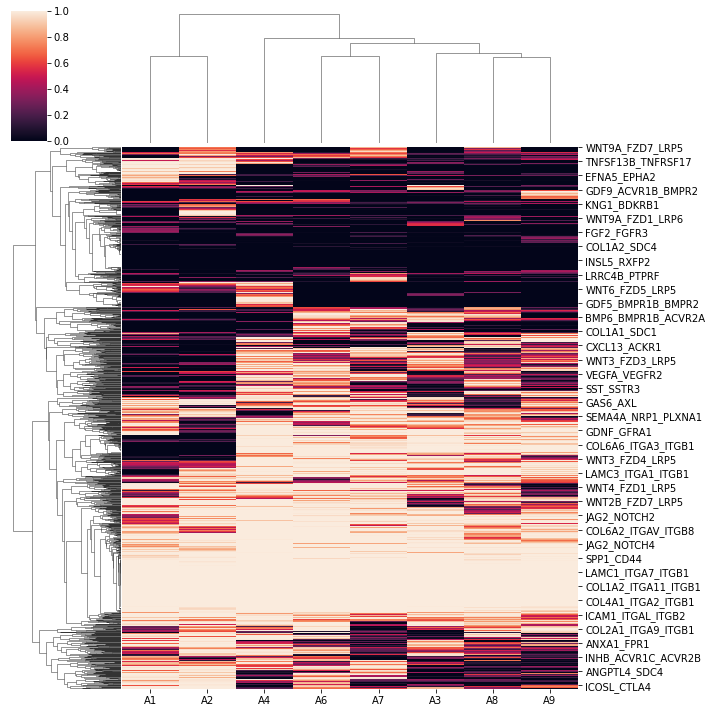

In [41]:
import seaborn as sns
sns.clustermap(1-concat.p_df)

In [42]:
conditions = np.hstack((np.repeat([1],2), np.repeat([0],4)))
subset = ['A1', 'A2', 'A3', 'A4', 'A8', 'A9']

In [43]:
concat.differential_test(subset, conditions)

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/spatialdm/diff_utils.py:109: RuntimeWarning: invalid value encountered in double_scalars
  LR_statistic[i] = -2 * (reduced_ll - full_ll)


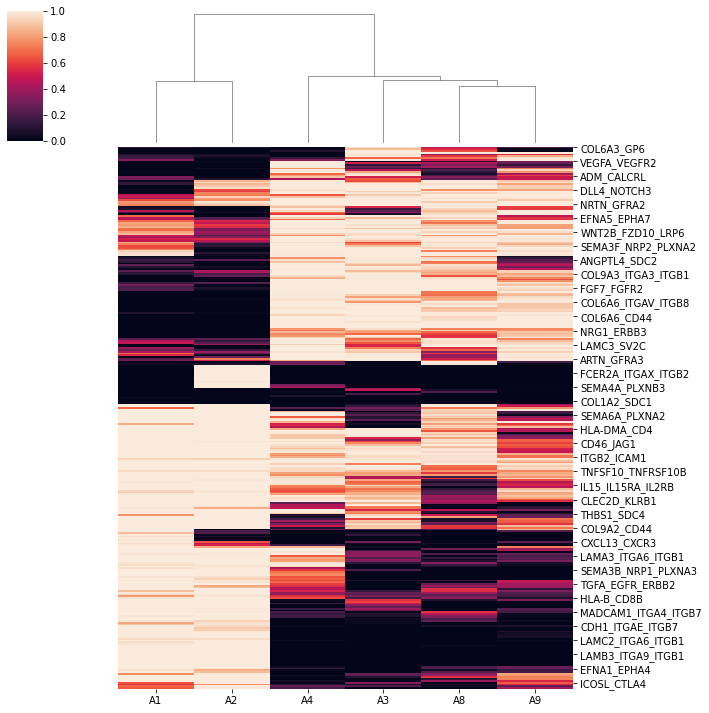

In [45]:
cg = sns.clustermap(1-concat.p_df.loc[(concat.p_val<0.1) & (concat.tf_df.sum(1).isin([1,2,3,4,5])),subset])
cg.ax_row_dendrogram.set_visible(False)

In [49]:
concat.group_differential_pairs('adult', 'fetus')

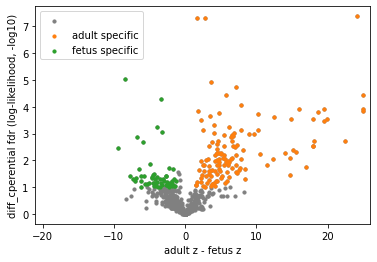

In [177]:
volcano(concat, legend=['adult specific', 'fetus specific'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

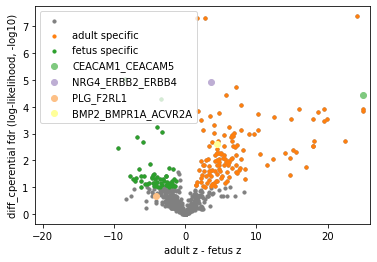

In [178]:
volcano(concat, pairs=['CEACAM1_CEACAM5', 'NRG4_ERBB2_ERBB4', 'PLG_F2RL1','BMP2_BMPR1A_ACVR2A'], 
        legend=['adult specific', 'fetus specific'], )

In [52]:
compute_pathway(concat, ls=concat.adult_specific.values, path_name = 'adult_specific_pathways')

compute_pathway(concat, ls=concat.fetus_specific.values, path_name = 'fetus_specific_pathways')

In [53]:
# remove pathways with only one hit
concat.path_summary['fetus_specific_pathways']['counts'] = \
    concat.path_summary['fetus_specific_pathways']['counts'][concat.path_summary['fetus_specific_pathways']['counts']>1]

concat.path_summary['adult_specific_pathways']['counts'] = \
    concat.path_summary['adult_specific_pathways']['counts'][concat.path_summary['adult_specific_pathways']['counts']>1]

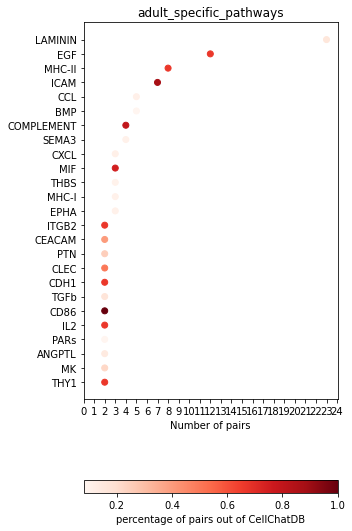

In [175]:
dot_path(concat, 'adult_specific_pathways', figsize=(5,8))

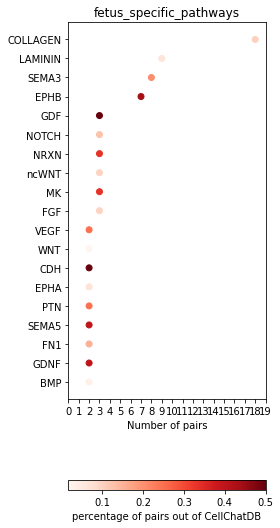

In [176]:
dot_path(concat, 'fetus_specific_pathways', figsize=(4,8))

## cross-replicate consistency 

In [56]:
I_df = pd.DataFrame(pd.Series(sample.global_I, index=sample.global_res.index) for sample in samples)

In [57]:
I_df = I_df.transpose()

In [58]:
I_df.columns = data

Text(0.5, 1.0, "Moran's I between replicates")

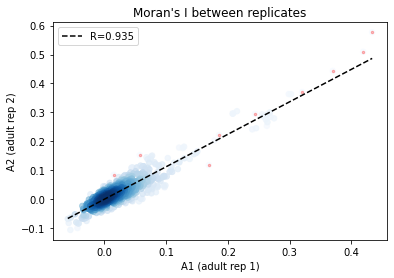

In [59]:
from hilearn import *
_df = I_df.loc[:, ['A1', 'A2']].dropna()
corr_plot(_df.A1.values, _df.A2.values)
plt.xlabel('A1 (adult rep 1)')
plt.ylabel('A2 (adult rep 2)')
plt.title('Moran\'s I between replicates')

Text(0.5, 1.0, "Moran's I between replicates")

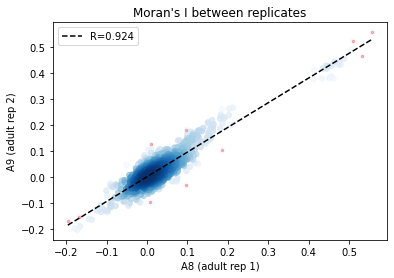

In [60]:
_df = I_df.loc[:, ['A8', 'A9']].dropna()
corr_plot(_df.A8.values, _df.A9.values)
plt.xlabel('A8 (adult rep 1)')
plt.ylabel('A9 (adult rep 2)')
plt.title('Moran\'s I between replicates')

Text(0.5, 1.0, "Moran's I between non-biological replicates")

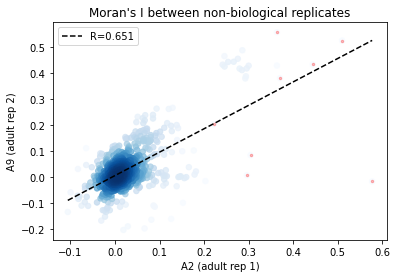

In [61]:
_df = I_df.loc[:, ['A2', 'A9']].dropna()
corr_plot(_df.A2.values, _df.A9.values)
plt.xlabel('A2 (adult rep 1)')
plt.ylabel('A9 (adult rep 2)')
plt.title('Moran\'s I between non-biological replicates')

In [90]:
PLG_df = pd.DataFrame(A3_adata.obs.columns, index=A3_adata.obs.columns)

In [130]:
pair='PLG_F2RL1'
for d,sample in zip(data,samples):
    sample.celltype = locals()['{}_adata'.format(d)].obs
    if pair in sample.local_z_p.index:
        ct_max=sample.celltype.sum(0)
        ct=sample.celltype[sample.local_z_p.loc[pair].values<0.1].sum(0).sort_values(ascending=False)
        ct=ct[ct>0]
        PLG_df['{}'.format(d)]=ct#/ct_max
    else:
        PLG_df['{}'.format(d)] = 0

In [93]:
PLG_df.pop(0)

pDCs                                              pDCs
Cell Cycle                                  Cell Cycle
Type 3 ILCs                                Type 3 ILCs
B-Cells                                        B-Cells
DCs                                                DCs
                                       ...            
Inhibitory Motor Neuron        Inhibitory Motor Neuron
Intraganglionic Glial            Intraganglionic Glial
Neuroendocrine (2)                  Neuroendocrine (2)
Lymphoid Associated Glial    Lymphoid Associated Glial
Neuroendocrine (1)                  Neuroendocrine (1)
Name: 0, Length: 94, dtype: object

In [131]:
other=PLG_df.loc[~PLG_df.index.isin(['Distal Enterocytes','Distal Mature Enterocytes'])].sum(0)

df =pd.concat((PLG_df.loc[PLG_df.index.isin(['Distal Enterocytes','Distal Mature Enterocytes'])],
    pd.DataFrame(other, columns=['other cell types']).transpose()))

In [132]:
df = df.transpose()

df['sample']=df.index

In [133]:
df

,Distal Enterocytes,Distal Mature Enterocytes,other cell types,sample
A1,0.000000,0.000000,0.000000,A1
A2,0.000000,0.000000,0.000000,A2
A3,1.340450,4.653944,0.005606,A3
A4,0.000000,0.000000,0.000000,A4
A6,0.039107,2.046596,7.914297,A6
A7,NaN,1.344077,5.655923,A7
A8,3.726431,5.998604,4.274965,A8
A9,0.923373,2.786092,0.290535,A9


<Figure size 432x288 with 0 Axes>

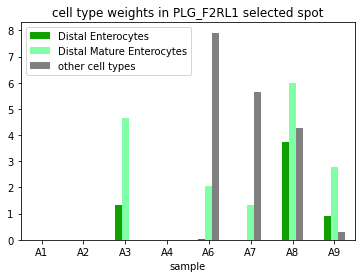

In [134]:
plt.figure()
ax=df.sort_index().plot(x='sample',
        kind='bar',
        stacked=False,
        title='cell type weights in PLG_F2RL1 selected spot', 
        color={'Distal Mature Enterocytes': [0.5       , 1.        , 0.65808859, 1.        ],
              'Distal Enterocytes': [0.06331813, 0.62857143, 0.        , 1.        ],
#                'neuron':[0.99848342, 0.875     , 0.99522066, 1.        ],
              'other cell types': 'grey'})
ax.set_xticklabels(df.sort_index().index, rotation=0)
plt.savefig('../tutorial/PLG_bar.pdf')